## 导入必要的库

In [60]:
#引入相关模块
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

tf.random.set_seed(42) # 使用相同的随机种子确保实验结果能够复现

## 数据读取和分析处理

### 数据读取

In [61]:
full_data = pd.read_excel('Volve_production_data.xlsx')
full_data

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


### 数据分析

In [62]:
# 数据中所包含的列
full_data.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

使用动态（生产）数据，如：`ON_STREAM_HRS, AVG_DOWNHOLE_PRESSURE, AVG_DOWNHOLE_TEMPERATURE, AVG_DP_TUBING, AVG_ANNULUS_PRESS, AVG_CHOKE_SIZE_P, AVG_CHOKE_UOM, AVG_WHP_P, AVG_WHT_P, DP_CHOKE_SIZE,`和`BORE_OIL_VOL`来训练我们的LSTM模型。


In [63]:
unique_well_bore = full_data['NPD_WELL_BORE_NAME'].unique()
print("所有油井的名称:")
print(unique_well_bore)

unique_producer_well_bore = full_data[full_data['FLOW_KIND'] == 'production']['NPD_WELL_BORE_NAME'].unique()
print("\n产油井名称:")
print(unique_producer_well_bore)

unique_injection_well_bore = full_data[full_data['FLOW_KIND'] == 'injection']['NPD_WELL_BORE_NAME'].unique()
print("\n注水井名称:")
print(unique_injection_well_bore)

所有油井的名称:
['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']

产油井名称:
['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-5']

注水井名称:
['15/9-F-4' '15/9-F-5']


按时间顺序对数据进行排序

In [64]:
full_data = full_data.sort_values(by='DATEPRD')

使用所有的产油井数据作为训练数据，预测油产量

In [65]:
data = full_data[(full_data['FLOW_KIND'] == 'production')][['DATEPRD', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL']]

查看样本数量

In [66]:
data.shape[0]

9161

In [67]:
# 查看数据缺失情况
null_data = data.isnull().sum()
null_data

DATEPRD                        0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        181
AVG_DOWNHOLE_TEMPERATURE     181
AVG_DP_TUBING                181
AVG_ANNULUS_PRESS           1271
AVG_CHOKE_SIZE_P             242
AVG_WHP_P                      6
AVG_WHT_P                     15
DP_CHOKE_SIZE                  6
BORE_OIL_VOL                   0
dtype: int64

In [68]:
# 缺失值丢弃处理
data = data.dropna()
null_data = data.isnull().sum()
null_data

DATEPRD                     0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
dtype: int64

In [69]:
# 最终样本数量
print("最终样本数量为: ", data.shape[0])

最终样本数量为:  7504


In [70]:
data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
1911,2008-02-12,11.50000,308.055940,104.418090,201.250000,18.639557,14.484431,106.805939,16.294718,92.475107,284.65
1912,2008-02-13,24.00000,303.033518,105.402696,182.144942,16.466641,22.832986,120.888576,53.374330,89.620148,1869.70
1913,2008-02-14,22.50000,295.586061,105.775486,181.867887,12.659589,31.249966,113.718175,72.737631,80.120465,3124.09
1914,2008-02-15,23.15000,297.662702,105.751875,180.832060,5.264052,28.518930,116.830642,69.995943,84.250990,2608.28
1915,2008-02-16,24.00000,295.935519,105.811114,180.501045,12.384634,30.227902,115.434474,71.518347,82.359026,3051.80
...,...,...,...,...,...,...,...,...,...,...,...
1909,2016-09-16,24.00000,252.892344,105.275896,226.022291,22.570981,100.000000,26.870053,83.607970,3.402087,530.27
1910,2016-09-17,8.27514,253.546058,105.279492,226.081196,22.636336,73.763718,27.464862,85.028862,4.191001,180.04
4966,2016-09-17,0.00000,0.000000,0.000000,0.000000,19.958520,0.903394,0.000000,0.000000,0.025740,0.00
9000,2016-09-17,0.00000,345.906770,90.034330,345.906770,0.000000,0.990500,0.000000,0.000000,14.260850,0.00


### 数据可视化

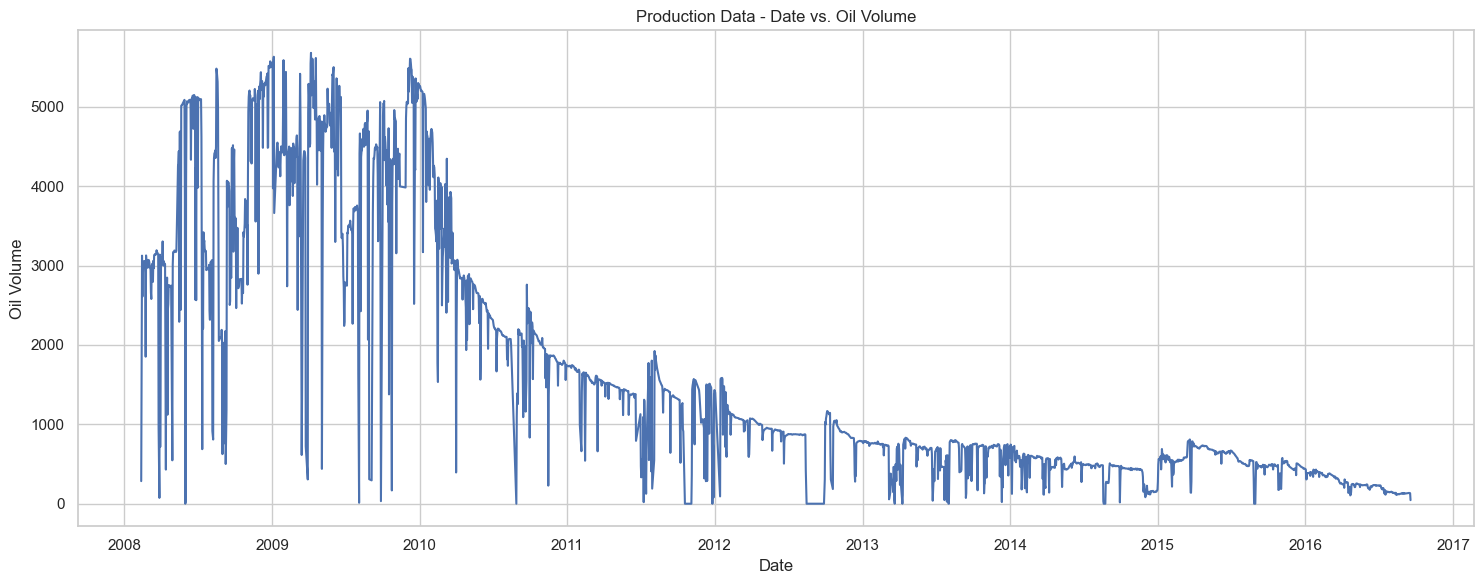

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL',errorbar=None)
plt.xlabel('Date')
plt.ylabel('Oil Volume')
plt.title('Production Data - Date vs. Oil Volume')
plt.tight_layout()
plt.show()

### 数据预处理

数据中各特征数据范围不统一，模型可能对部分数值范围更大的特征变化更敏感，使用sklearn的MinMaxScaler将数据分布拉到(0, 1)的范围内

In [72]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL']
data_to_scale = data[columns_to_scale].copy()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_to_scale)
# 将Numpy数组转换成Pandas DataFrame对象
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_to_scale)

# 将DATEPRD列作为第一列，用于可视化数据
data_scaled_df.insert(0, 'DATEPRD', data['DATEPRD'])

In [73]:
data_scaled_df

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
0,2014-04-07,0.460000,0.774811,0.971263,0.581804,0.620908,0.144844,0.777839,0.174257,0.745028,0.048338
1,NaT,0.960000,0.762179,0.980421,0.526572,0.548525,0.228330,0.880400,0.570790,0.722027,0.317507
2,NaT,0.900000,0.743447,0.983889,0.525771,0.421708,0.312500,0.828179,0.777863,0.645493,0.530524
3,NaT,0.926000,0.748670,0.983669,0.522777,0.175352,0.285189,0.850847,0.748543,0.678770,0.442930
4,2014-04-11,0.960000,0.744326,0.984220,0.521820,0.412548,0.302279,0.840679,0.764824,0.663528,0.518248
...,...,...,...,...,...,...,...,...,...,...,...
7499,2015-04-13,0.960000,0.636065,0.979242,0.653420,0.751869,1.000000,0.195688,0.894111,0.027409,0.090049
7500,2015-04-14,0.331006,0.637710,0.979275,0.653590,0.754046,0.737637,0.200019,0.909306,0.033765,0.030574
7501,2015-04-15,0.000000,0.000000,0.000000,0.000000,0.664845,0.009034,0.000000,0.000000,0.000207,0.000000
7502,2015-04-16,0.000000,0.870012,0.837470,1.000000,0.000000,0.009905,0.000000,0.000000,0.114893,0.000000


### 数据建模

在LSTM中，我们输入前一个时间步长的数据，并预测当前时间步长的目标。在我们的例子中，我们将输入前一个时间步长（前一天）的所有特征，包括石油产量，我们将预测当前时间步长（今天）的石油产量。

从处理好的的数据中选择特征和标签。使用`windowed_dataset`函数获取前一时间步的特征和当前时间步的目标

这里对油产量进行建模，并将数据由DataFrame对象转换成Numpy数据类型

In [74]:
features = data_scaled_df[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL']].to_numpy()

target = data_scaled_df[['BORE_OIL_VOL']].to_numpy()

### 划分数据集

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(features, target, test_size=0.3, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("训练集样本数量:", X_train.shape[0])
print("验证集样本数量:", X_val.shape[0])
print("测试集样本数量:", X_test.shape[0])

训练集样本数量: 5252
验证集样本数量: 1126
测试集样本数量: 1126


可视化划分数据集

C:\Users\luofei\AppData\Local\Temp\ipykernel_28568\1539548707.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.lineplot(x=data['DATEPRD'][:Y_train.shape[0]].ravel(), y=Y_train.ravel(), label='Train', errorbar=None)
C:\Users\luofei\AppData\Local\Temp\ipykernel_28568\1539548707.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.lineplot(x=data['DATEPRD'][Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]].ravel(), y=Y_val.ravel(), label='Val', errorbar=None)
C:\Users\luofei\AppData\Local\Temp\ipykernel_28568\1539548707.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.lineplot(x=data['DATEPRD'][Y_train.shape[0] + 

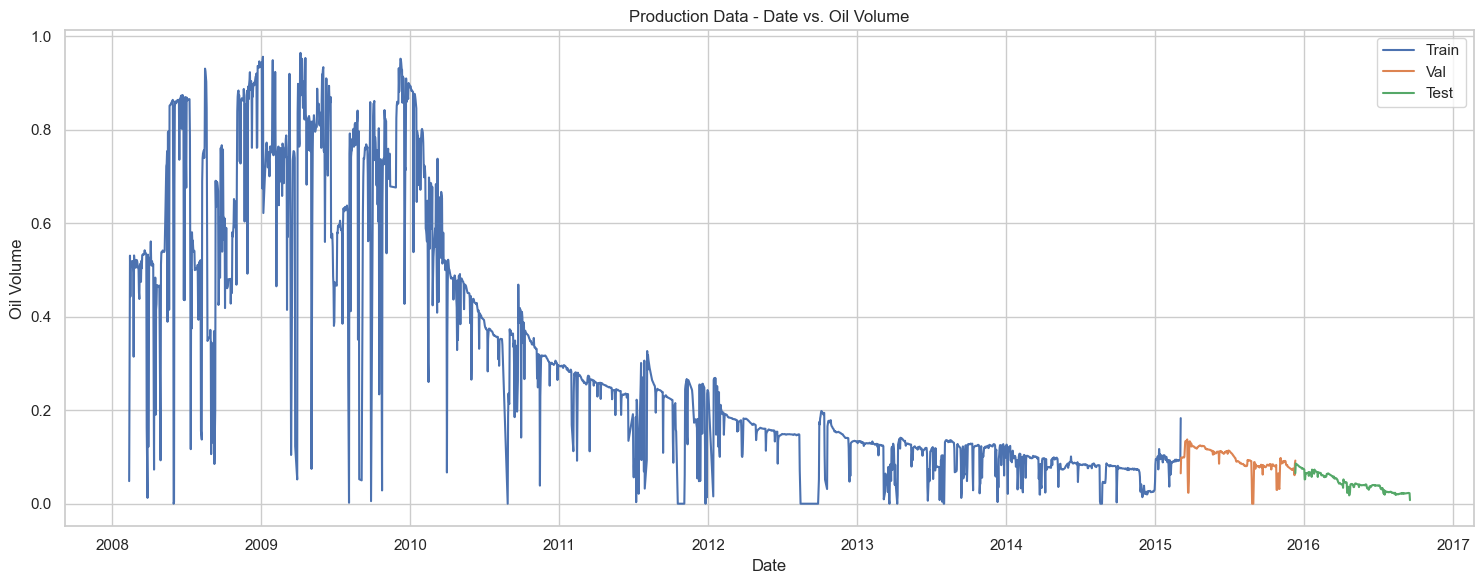

In [76]:
plt.figure(figsize=(15, 6))

sns.lineplot(x=data['DATEPRD'][:Y_train.shape[0]].ravel(), y=Y_train.ravel(), label='Train', errorbar=None)
sns.lineplot(x=data['DATEPRD'][Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]].ravel(), y=Y_val.ravel(), label='Val', errorbar=None)
sns.lineplot(x=data['DATEPRD'][Y_train.shape[0] + Y_val.shape[0]:Y_train.shape[0] + Y_val.shape[0] + Y_test.shape[0]].ravel(), y=Y_test.ravel(), label='Test', errorbar=None)

plt.xlabel('Date')
plt.ylabel('Oil Volume')
plt.title('Production Data - Date vs. Oil Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 建模

### 构建时间窗数据



In [77]:
def windowed_dataset(features, target, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((features, target))
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(window_size + 1), y.batch(window_size + 1))))
    dataset = dataset.map(lambda x, y: (x[:-1], y[1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

将上述函数应用于数据

In [78]:
tf.random.set_seed(42)
window_size = 5
batch_size = 32
train_set = windowed_dataset(X_train, Y_train, window_size, batch_size)
val_set = windowed_dataset(X_val, Y_val, window_size, batch_size)
test_set = windowed_dataset(X_test, Y_test, window_size, batch_size)

In [79]:
train_iterator = iter(train_set)
first_element = next(train_iterator)
features_shape = first_element[0].shape
target_shape = first_element[1].shape

print("输入形状:", features_shape)
print("输出形状:", target_shape)

输入形状: (32, 5, 10)
输出形状: (32, 5, 1)


In [80]:
first_sample = (first_element[0][0], first_element[1][0])

for day in range(len(first_sample[0])):
    print(f"\033[1;34mDay {day + 1} Data:\033[0m")
    print(f"输入数据: day {day + 1}: {first_sample[0][day]}")
    print(f"油产量预测: day {day + 2}: {first_sample[1][day]}")
    print()

Day 1 Data:
输入数据: day 1: [0.46       0.77481089 0.97126284 0.58180417 0.62090818 0.14484431
 0.77783947 0.1742572  0.74502803 0.04833843]
油产量预测: day 2: [0.31750695]

Day 2 Data:
输入数据: day 2: [0.96       0.76217868 0.98042132 0.52657235 0.54852549 0.22832986
 0.8803996  0.57078994 0.72202698 0.31750695]
油产量预测: day 3: [0.53052377]

Day 3 Data:
输入数据: day 3: [0.9        0.74344712 0.9838889  0.5257714  0.42170758 0.31249966
 0.82817946 0.77786284 0.64549255 0.53052377]
油产量预测: day 4: [0.44293043]

Day 4 Data:
输入数据: day 4: [0.926      0.74867021 0.98366927 0.52277688 0.17535249 0.2851893
 0.85084674 0.74854299 0.67877023 0.44293043]
油产量预测: day 5: [0.51824769]

Day 5 Data:
输入数据: day 5: [0.96       0.74432606 0.9842203  0.52181993 0.41254845 0.30227902
 0.84067882 0.76482371 0.66352757 0.51824769]
油产量预测: day 6: [0.50650145]



### 定义模型

改进的LSTM架构：基于LSTM + Attention的石油产量预测模型

In [81]:
def LSTM_MHA(window_size, features_count):
    """
    定义一个带有Attention机制的LSTM模型。

    参数:
    window_size (int): 输入序列的时间步长。
    features_count (int): 每个时间步的特征数量。

    返回:
    tf.keras.Model: Keras模型实例。
    """
    
    # 输入层
    inputs = tf.keras.Input(shape=(window_size, features_count), name="input_layer")

    # 第一个LSTM层
    lstm_out_1 = tf.keras.layers.LSTM(128, return_sequences=True, name="lstm_1")(inputs)
    dropout_1 = tf.keras.layers.Dropout(0.5, name="dropout_1")(lstm_out_1)

    # 多头注意力机制
    attention_out = tf.keras.layers.MultiHeadAttention(
        num_heads=4, 
        key_dim=32,  # 输出维度将是 num_heads * key_dim = 4 * 32 = 128
        name="MHA"
    )(query=dropout_1, value=dropout_1, key=dropout_1)
    
    #目标也是一个序列，所以这里应该 return_sequences=True
    lstm_out_2 = tf.keras.layers.LSTM(64, return_sequences=True, name="lstm_2")(attention_out)
    dropout_2 = tf.keras.layers.Dropout(0.5, name="dropout_2")(lstm_out_2)

    # Keras的Dense层会自动作用于序列的最后一个维度，所以TimeDistributed不是必需的，如果LSTM(return_sequences=True)
    outputs = tf.keras.layers.Dense(1, name="output_layer")(dropout_2) # 输出 (batch_size, window_size, 1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="LSTM_With_Attention_Model")
    
    return model

# 创建模型实例
model = LSTM_MHA(window_size, features_shape[2] )

# 打印模型摘要
model.summary()


Model: "LSTM_With_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 5, 128)    │     71,168 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 5, 128)    │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MHA                 │ (None, 5, 128)    │     66,048 │ dropout_1[0][0],  │
│ (MultiHeadAttentio… │                   │            │ dropout_1[0][0],  │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 5, 64)     │     49,408 │ MHA[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 5, 64)     │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 5, 1)      │         65 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 186,689 (729.25 KB)

 Trainable params: 186,689 (729.25 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
tf.random.set_seed(42)

epochs = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=125, restore_best_weights=True)
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=val_set,
    shuffle=False,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/1000
    161/Unknown 4s 11ms/step - loss: 0.1859

c:\Users\luofei\miniconda3\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1831 - val_loss: 0.0093
Epoch 2/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1248 - val_loss: 0.0091
Epoch 3/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1140 - val_loss: 0.0094
Epoch 4/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0985 - val_loss: 0.0092
Epoch 5/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0847 - val_loss: 0.0095
Epoch 6/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0654 - val_loss: 0.0094
Epoch 7/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0500 - val_loss: 0.0090
Epoch 8/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0370 - val_loss: 0.0088
Epoch 9/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0299 - val_loss: 0.0087
Epoch 10/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0257 - val_loss: 0.0087
Epoch 11/1000
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0233 - val_loss: 0.0085
Epoch 12/1000
164/164 ━━━━━━━━━━

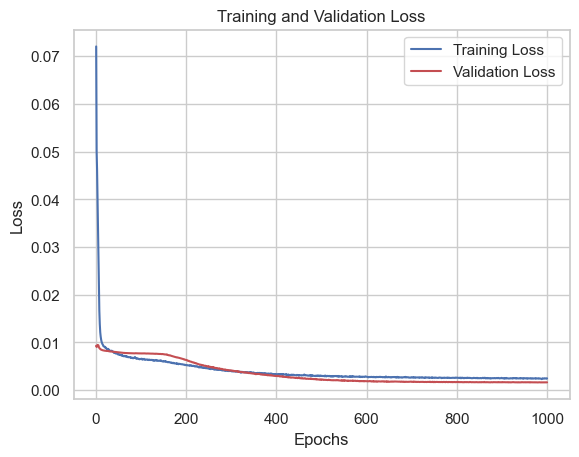

In [83]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
# 1. 先提取出原始的 X_test 和 y_test NumPy 阵列
import numpy as np

# 假设 test_set 是一个 tf.data.Dataset，按 batch 分好
# 下面这两行会把所有 batch 拼成一个整体数组
X_test_array = np.vstack([batch[0] for batch in test_set])
y_test_array = np.concatenate([batch[1] for batch in test_set])

# 2. 模型预测
predictions = model.predict(test_set)  # 形状可能是 (n_samples, 1) 或 (n_samples, window_size, n_feat)
print("predictions.shape =", predictions.shape)

# 3. 重塑 predictions
if predictions.ndim == 3:
    # 如果是三维 (n, t, f)，取最后一个时间步的所有特征
    predictions_reshaped = predictions[:, -1, :]
elif predictions.ndim == 2:
    # 如果是二维 (n, f)，直接用
    predictions_reshaped = predictions
else:
    raise ValueError(f"Unexpected predictions ndim = {predictions.ndim}")

# 4. 构造 df_scaled_predictions
# 假设我们只预测一个目标列，列名 'PREDICTED_OIL'；如果多维，请自行修改 columns 参数
df_scaled_predictions = pd.DataFrame(predictions_reshaped, columns=['PREDICTED_OIL'])

# 5. 构造测试特征 DataFrame：只取每个样本最后一个时刻的原始特征
#    假设 columns_to_scale[:-1] 是所有特征列名（最后一列是目标）
feature_names = columns_to_scale[:-1]
features_last_step = X_test_array[:, -1, :]   # (n_samples, n_features)
df_x_test_features = pd.DataFrame(features_last_step, columns=feature_names)

# 6. 拼接特征和预测列，确保顺序与 scaler.fit 时一致
df_pred_intermediate = pd.concat([df_x_test_features, df_scaled_predictions], axis=1)[columns_to_scale]

# 7. 逆向缩放
rev_trans = scaler.inverse_transform(df_pred_intermediate)
df_final = pd.DataFrame(rev_trans, columns=columns_to_scale)

# 8. 补上日期和真实值列，方便可视化和评估
n = len(df_final)
df_final['DATEPRD']     = data['DATEPRD'].iloc[-n:].values
df_final['BORE_OIL_VOL'] = data['BORE_OIL_VOL'].iloc[-n:].values

# ——到这里，df_final 中就有 ['DATEPRD', ..., 'BORE_OIL_VOL', 'PREDICTED_OIL']——

# 9. 可视化
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final, x='DATEPRD', y='BORE_OIL_VOL',   label='Actual',  errorbar=None)
sns.lineplot(data=df_final, x='DATEPRD', y='PREDICTED_OIL',  label='Predicted',errorbar=None)
plt.xlabel('Date')
plt.ylabel('Oil Production')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

# 10. 计算评估指标
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = df_final['BORE_OIL_VOL']
y_pred = df_final['PREDICTED_OIL']

mse  = mean_squared_error(y_true, y_pred)
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_true, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
predictions.shape = (1121, 5, 1)


ValueError: Shape of passed values is (1121, 10), indices imply (1121, 9)

In [ ]:

# scaled_predicted_target = predictions[:, -1, :]
# actual_scaled_features_non_target = X_test[window_size:, :-1] # 形状 (1121, 9)


# df_for_inverse = pd.DataFrame(columns=columns_to_scale)

# # 填充前9个特征 (来自X_test的实际值)
# for i, col_name in enumerate(columns_to_scale[:-1]):
#     df_for_inverse[col_name] = actual_scaled_features_non_target[:, i]

# # 填充最后一个特征 (BORE_OIL_VOL) 为模型的预测值
# df_for_inverse[columns_to_scale[-1]] = scaled_predicted_target.flatten() # flatten使其成为1D

# # 执行逆变换
# rev_trans = scaler.inverse_transform(df_for_inverse)

# df_final = data.iloc[-predictions.shape[0]:].copy() 
# df_final['PREDICTED_OIL'] = rev_trans[:, -1]

In [ ]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_final, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', errorbar=None)
# sns.lineplot(data=df_final, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', errorbar=None)
# plt.xlabel('Date')
# plt.ylabel('Oil Production')
# plt.title('Actual vs. Predicted')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# compare_data = df_final[['DATEPRD', 'BORE_OIL_VOL', 'PREDICTED_OIL']]
# compare_data

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # 假设 compare_data 是包含真实值和预测值的 DataFrame
# # compare_data = df_final[['DATEPRD', 'BORE_OIL_VOL', 'PREDICTED_OIL']]

# # 提取真实值和预测值
# y_true = compare_data['BORE_OIL_VOL']
# y_pred = compare_data['PREDICTED_OIL']

# # 计算 MSE
# mse = mean_squared_error(y_true, y_pred)
# print(f"均方误差 (MSE): {mse}")

# # 计算 MAE
# mae = mean_absolute_error(y_true, y_pred)
# print(f"平均绝对误差 (MAE): {mae}")

# # 计算 RMSE
# rmse = np.sqrt(mse)
# print(f"均方根误差 (RMSE): {rmse}")

# # 计算 R²
# r2 = r2_score(y_true, y_pred)
# print(f"决定系数 (R²): {r2}")